In [119]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


In [120]:
iris = load_iris()

In [121]:
type(iris)

sklearn.utils._bunch.Bunch

In [122]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [123]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [124]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [125]:
iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [126]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [127]:
iris_df['Iris type'] = iris['target']

In [128]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [129]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [130]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [131]:
iris_df.shape

(150, 5)

In [179]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Iris type     150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [132]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Iris type'],
      dtype='object')

In [133]:
iris_df = iris_df.rename(columns={"sepal length (cm)": "sepal length","sepal width (cm)": "sepal width"
                                  ,"petal length (cm)": "petal length","petal width (cm)": "petal width"})

iris_df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'Iris type'],
      dtype='object')

# Draw the required plots to visualize the dataset

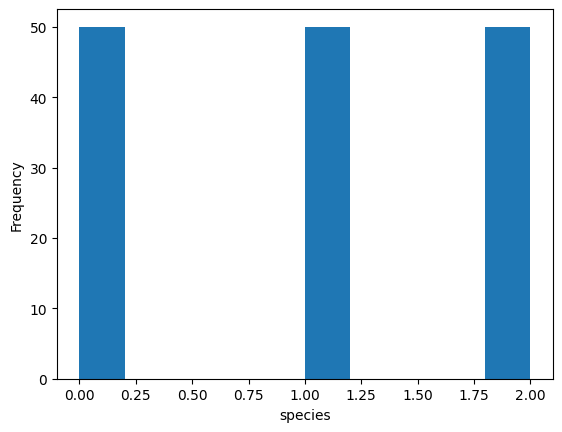

In [134]:
plt.hist(iris_df['Iris type'])
plt.xlabel('species')
plt.ylabel('Frequency')
plt.show()

In [135]:
correlation_matrix=iris_df.corr(numeric_only=True)
print(correlation_matrix)

              sepal length  sepal width  petal length  petal width  Iris type
sepal length      1.000000    -0.117570      0.871754     0.817941   0.782561
sepal width      -0.117570     1.000000     -0.428440    -0.366126  -0.426658
petal length      0.871754    -0.428440      1.000000     0.962865   0.949035
petal width       0.817941    -0.366126      0.962865     1.000000   0.956547
Iris type         0.782561    -0.426658      0.949035     0.956547   1.000000


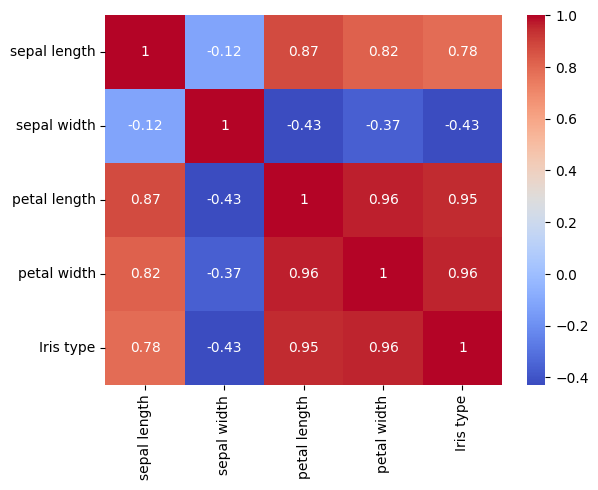

In [136]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

c:\Users\yeswa\envs\test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


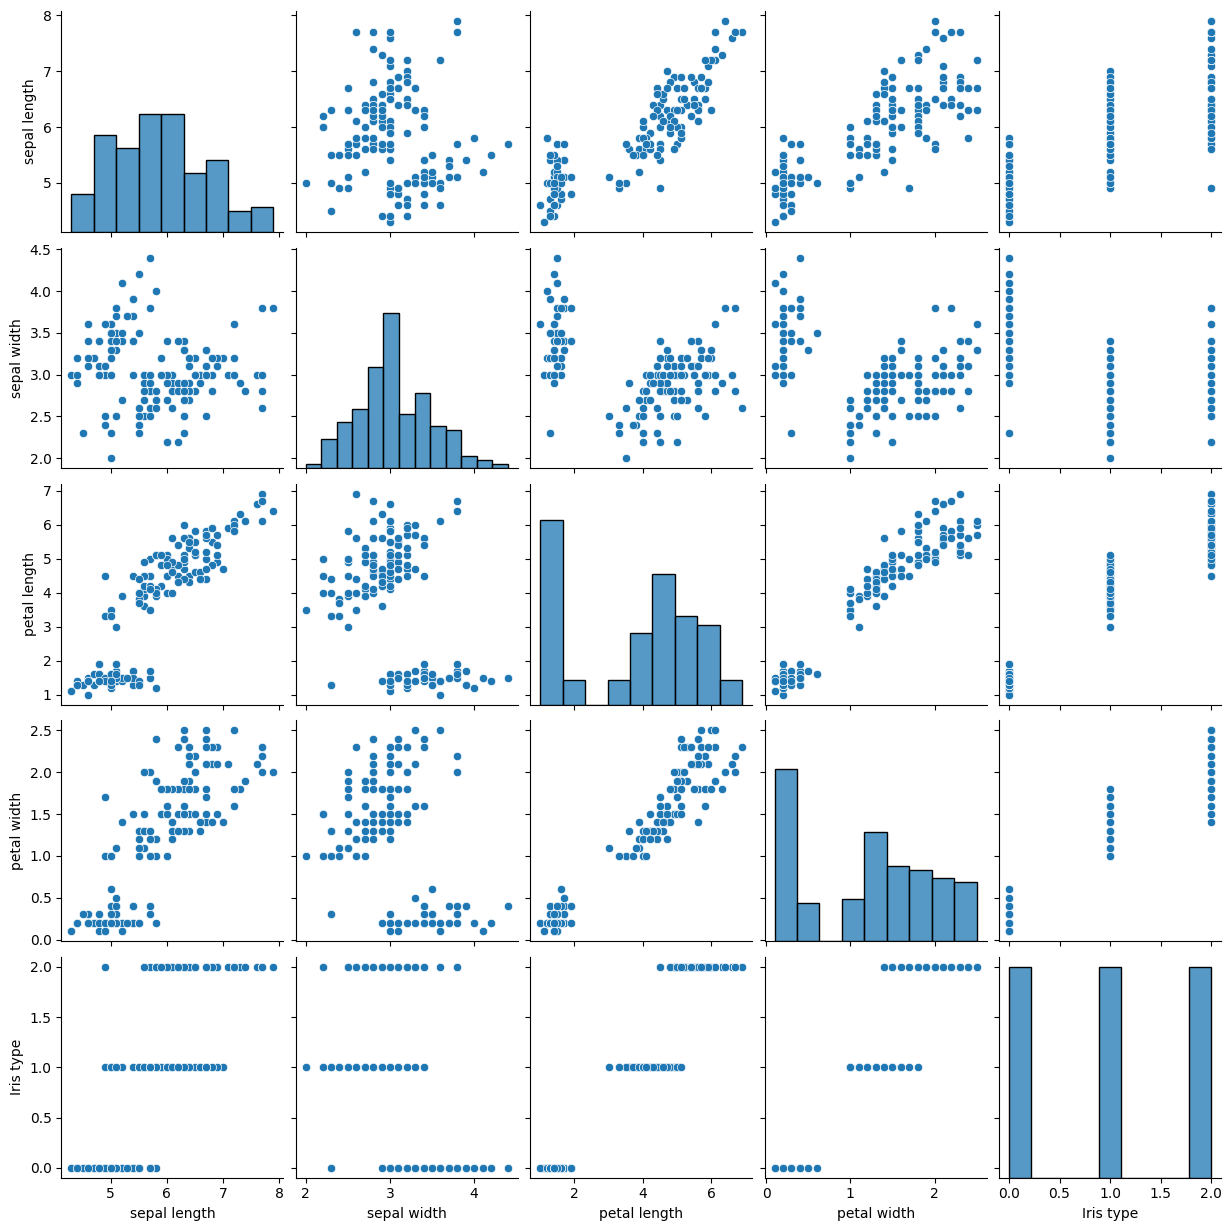

In [137]:
sns.pairplot(iris_df)
plt.show()

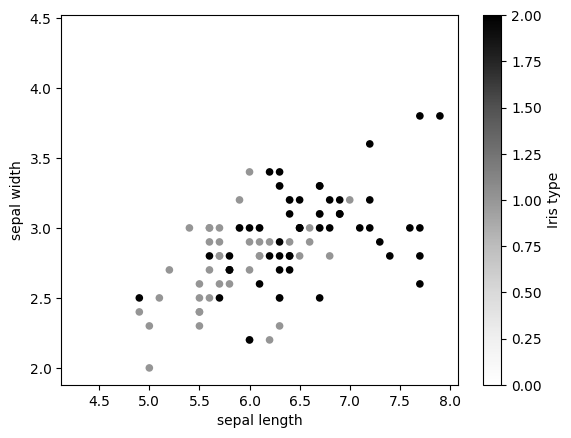

In [138]:
ax2 = iris_df.plot.scatter(x='sepal length',y='sepal width',c='Iris type')

# Split the dataset into training and testing sets (80% training, 20% testing)

In [139]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

In [140]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [141]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Iris type, Length: 150, dtype: int32

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [144]:
X_train

,sepal length,sepal width,petal length,petal width
9,4.9,3.1,1.5,0.1
59,5.2,2.7,3.9,1.4
16,5.4,3.9,1.3,0.4
122,7.7,2.8,6.7,2.0
7,5.0,3.4,1.5,0.2
...,...,...,...,...
39,5.1,3.4,1.5,0.2
91,6.1,3.0,4.6,1.4
31,5.4,3.4,1.5,0.4
40,5.0,3.5,1.3,0.3


In [145]:
X_test.head()

,sepal length,sepal width,petal length,petal width
139,6.9,3.1,5.4,2.1
125,7.2,3.2,6.0,1.8
67,5.8,2.7,4.1,1.0
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0


# Implement Logistic Regression using scikit-learn.

In [146]:
reg = LogisticRegression()

In [147]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [148]:
lr_model.coef_

array([[-0.41863886,  0.88656632, -2.37254854, -0.99806362],
       [ 0.48815342, -0.33539894, -0.17834322, -0.85764571],
       [-0.06951456, -0.55116738,  2.55089176,  1.85570933]])

In [149]:
lr_model.intercept_

array([  9.37621628,   2.23531397, -11.61153025])

In [150]:
y_pred1 = lr_model.predict(X_test)

In [151]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted Value': y_pred1})
print(df_pred)

     Actual  Predicted Value
139       2                2
125       2                2
67        1                1
3         0                0
113       2                2
52        1                1
18        0                0
137       2                2
20        0                0
64        1                1
73        1                1
30        0                0
102       2                2
19        0                0
10        0                0
133       2                2
51        1                1
63        1                1
135       2                2
28        0                0
115       2                2
45        0                0
46        0                0
2         0                0
140       2                2
17        0                0
44        0                0
126       2                2
75        1                1
69        1                1


In [152]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)


In [153]:
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

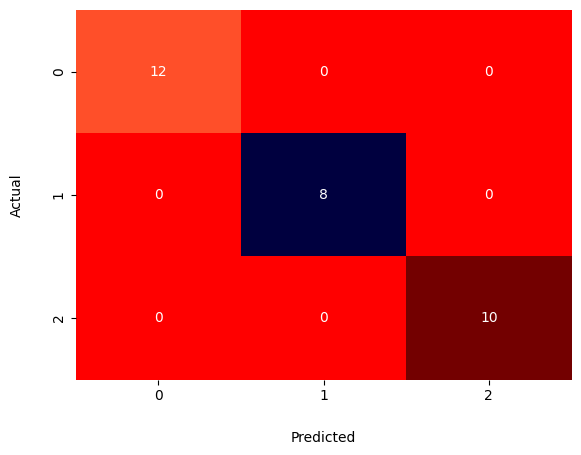

In [154]:
ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)
 
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()


In [155]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy = {accuracy}")


Accuracy = 1.0


In [156]:
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1score = f1_score(y_test, y_pred1, average='macro')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [157]:
# import numpy as np
# from sklearn.metrics import roc_auc_score

# y_test1 = np.array(y_test)
# y_pred1 = np.array(y_pred)

# y_test1 = y_test1.reshape(-1, 1)
# y_pred1 = y_pred1.reshape(-1, 1)

# auc = roc_auc_score(y_test1, y_pred1, multi_class='ovr')

# print(f"AUC-ROC = {auc}")

# Implement Naïve Bayes classifiers using scikit-learn.

In [158]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
nb_model = GaussianNB()

# Model training
nb_model.fit(X_train, y_train)

# Predict Output
y_pred2 = nb_model.predict(X_test)

print("Actual Value:", y_test )
print("Predicted Value:", y_pred2)

Actual Value: 139    2
125    2
67     1
3      0
113    2
52     1
18     0
137    2
20     0
64     1
73     1
30     0
102    2
19     0
10     0
133    2
51     1
63     1
135    2
28     0
115    2
45     0
46     0
2      0
140    2
17     0
44     0
126    2
75     1
69     1
Name: Iris type, dtype: int32
Predicted Value: [2 2 1 0 2 2 0 2 0 1 1 0 2 0 0 1 1 1 2 0 2 0 0 0 2 0 0 2 1 1]


In [159]:
y_pred = nb_model.predict(X_test)
accuray = accuracy_score(y_pred2, y_test)
f1 = f1_score(y_pred2, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)



Accuracy: 0.9333333333333333
F1 Score: 0.9333333333333333


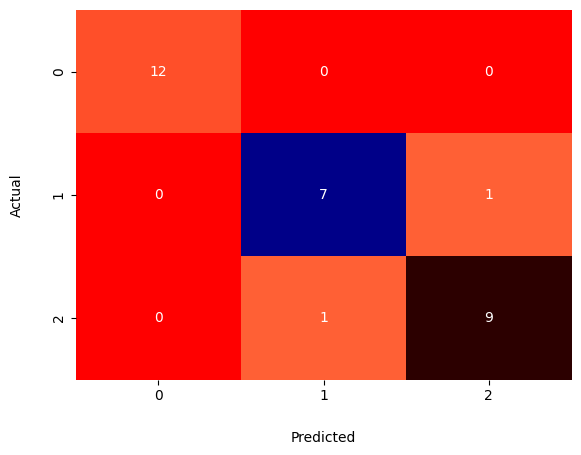

In [160]:
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)
 
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()


# Draw the AUC and RUC curve for each algorithm

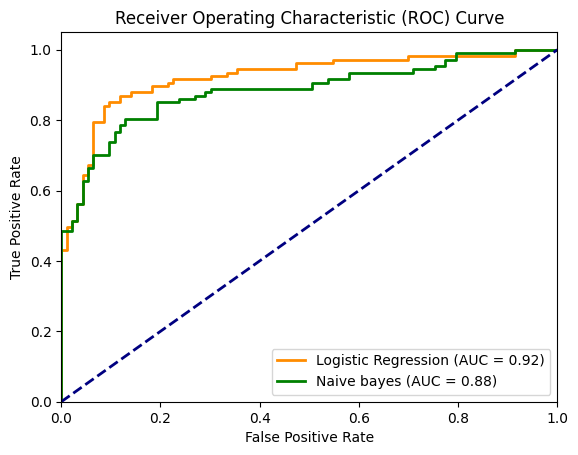

In [177]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train Naive Bayes model
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

# Predict probabilities for both models
y_scores_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_scores_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for both models
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_scores_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for both models
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()